In [3]:
import numpy as np
import pandas as pd
import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
keras = tf.keras

In [5]:
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

n_classes = 2
size =(200,200)

In [6]:
def load_data():
    datasets = ['Train/Train','Test/Test','Val/Val']
    output = []
    
    for dataset in datasets:
         imags=[]
         labels=[]
         directoryA = "archive (1)/"+dataset+"/Annotations"
         directoryIMG = "archive (1)/"+dataset+"/JPEGImages/"
         file = os.listdir(directoryA)
         img = os.listdir(directoryIMG)
         file.sort()
         img.sort()
         i = 0
         for xml in file:
            xmlf = os.path.join(directoryA, xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])
            try:        
                img_path = directoryIMG + img[i]
        
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
            except Exception as e:
                print(str(e))
           
            imags.append(curr_img)
            i+=1
        
         imags = np.array(imags,dtype='float32')
         imags = imags/255
        
         labels = np.array(labels,dtype='int32')
         output.append((imags,labels))
    return output
        
        

In [7]:
(train_images,train_labels),(test_images,test_labels),(val_images,val_labels)=load_data()

In [8]:
train_images.shape

(944, 200, 200, 3)

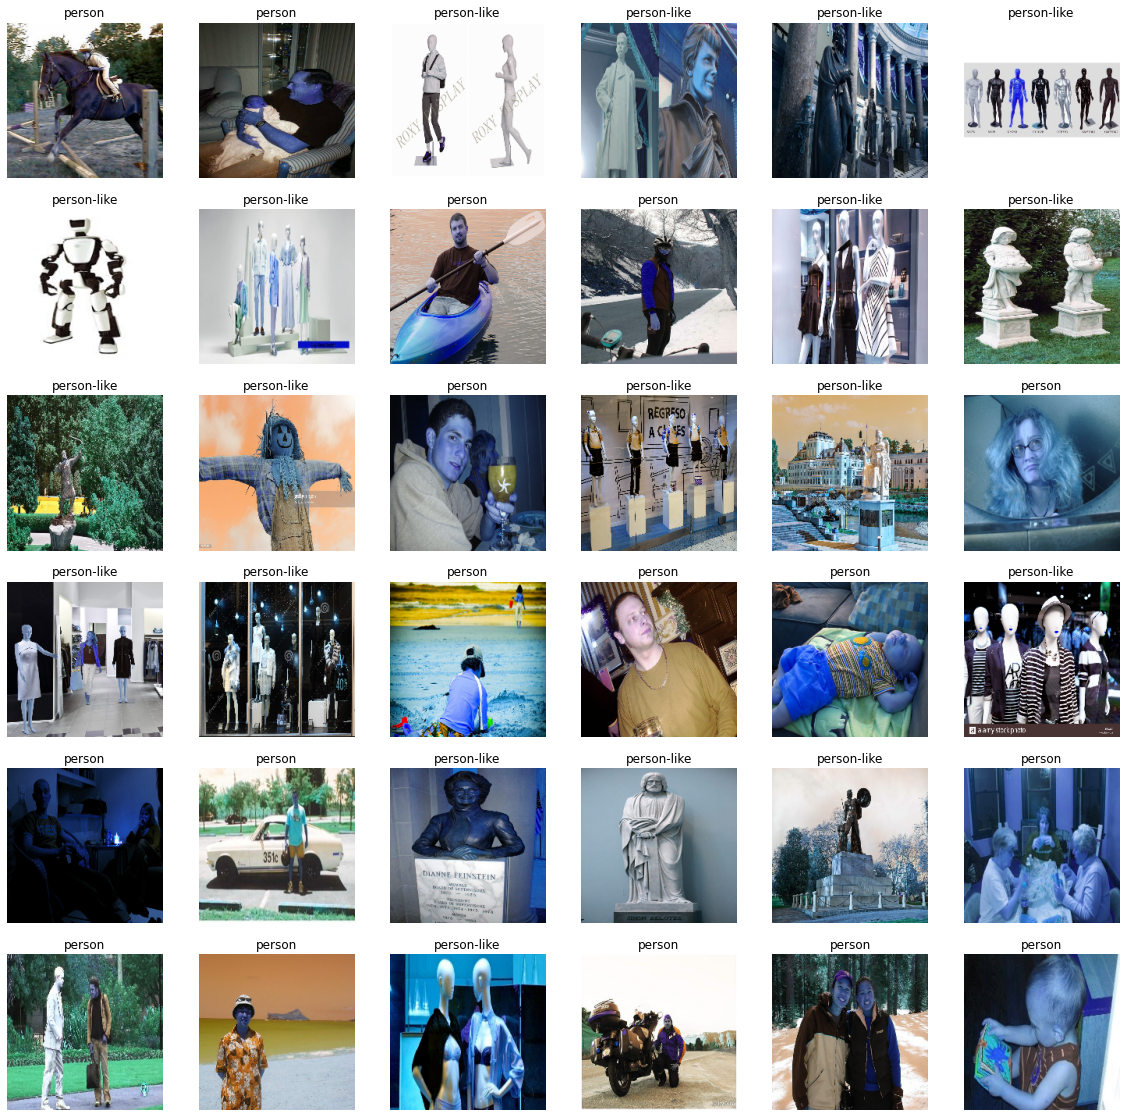

In [10]:
plt.figure(figsize=(20,20))
n=0
for i in np.random.randint(0,len(train_images),36):
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
    n=n+1

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2,2))) # n = filter size s = strides n=2,s=2 here, formula for max pooling = (n+2p-f)/s+1
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Train on 944 samples, validate on 235 samples
Epoch 1/10
944/944 [==============================] - 8s 8ms/sample - loss: 0.0027 - acc: 0.6081 - val_loss: 3.8832 - val_acc: 0.3660
Epoch 2/10
944/944 [==============================] - 7s 8ms/sample - loss: 0.0195 - acc: 0.5169 - val_loss: 5.7101 - val_acc: 0.2851
Epoch 3/10
944/944 [==============================] - 7s 8ms/sample - loss: 0.0079 - acc: 0.6261 - val_loss: 4.1614 - val_acc: 0.5957
Epoch 4/10
944/944 [==============================] - 7s 7ms/sample - loss: 0.0026 - acc: 0.6525 - val_loss: 4.1944 - val_acc: 0.5872
Epoch 5/10
944/944 [==============================] - 7s 8ms/sample - loss: 0.0018 - acc: 0.5816 - val_loss: 4.3873 - val_acc: 0.5021
Epoch 6/10
944/944 [==============================] - 7s 8ms/sample - loss: 0.0016 - acc: 0.5593 - val_loss: 4.4101 - val_acc: 0.4936
Epoch 7/10
944/944 [==============================] - 7s 8ms/sample - loss: 0.0024 - acc: 0.5572 - val_loss: 4.3873 - val_acc: 0.4979
Epoch 8/10
944/9

In [26]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))
    

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'go--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'go--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

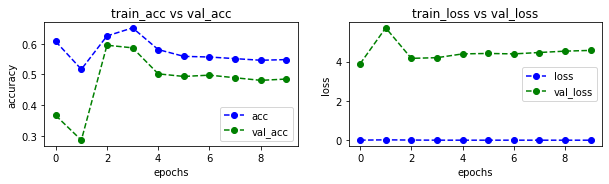

In [27]:
plot_accuracy_loss(history)

In [28]:
preds = model.predict(val_images)

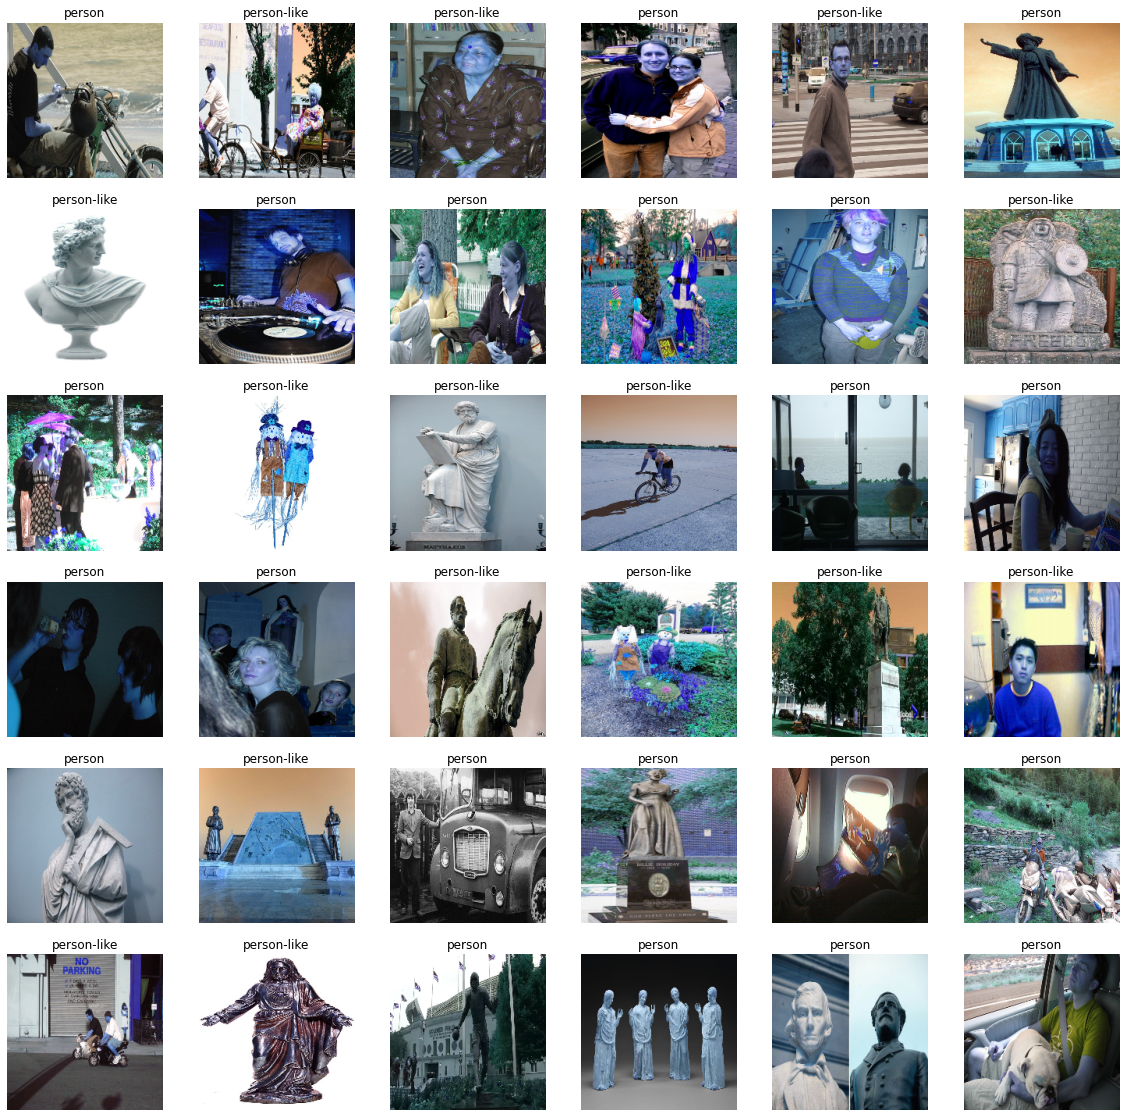

In [29]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])    
    plt.axis('off')
    x =np.argmax(preds[i])
    plt.title((class_names[x]))

In [30]:
result = []
for i in range(len(preds)):
    result.append(np.argmax(preds[i]))


In [31]:
tn, fp, fn, tp = confusion_matrix(val_labels,result).ravel()

In [32]:
(tn, fp, fn, tp)

(50, 35, 34, 41)

In [36]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2*((precision*recall)/precision+recall)

In [37]:
(precision,recall,f1score)

(0.5394736842105263, 0.5466666666666666, 2.1866666666666665)